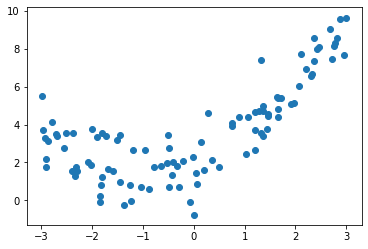

In [74]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)
plt.scatter(x, y)
plt.show()

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def learning_curve(X, y, alg):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    train_mses = []
    test_mses = []
    for i in range(1, len(X_train) + 1):
        alg.fit(X_train[:i, :], y_train[:i])
        y_train_predict = alg.predict(X_train[:i, :])
        y_test_predict = alg.predict(X_test)
        train_mses.append(mean_squared_error(y_train[:i], y_train_predict))
        test_mses.append(mean_squared_error(y_test, y_test_predict))
    plt.plot([i for i in range(1, len(X_train) + 1)], np.sqrt(train_mses), label='train')
    plt.plot([i for i in range(1, len(X_train) + 1)], np.sqrt(test_mses), color='r', label='test')
    plt.legend()
    plt.axis([0, len(X_train) + 1, 0, 4])
    plt.show()

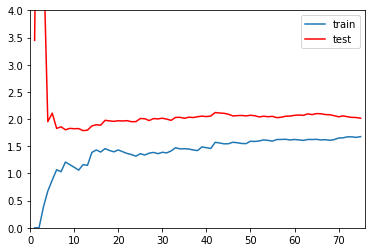

In [76]:
from sklearn.linear_model import LinearRegression
learning_curve(X, y, LinearRegression())


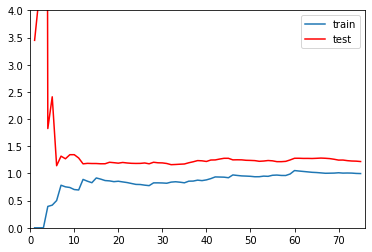

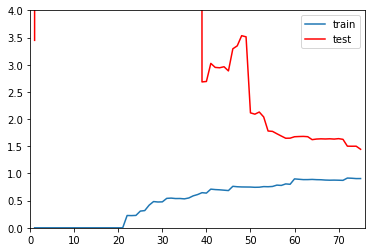

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

def polyn(degree = 2):
    return Pipeline([("poly", PolynomialFeatures(degree=degree)),
                      ("std_scaler", StandardScaler()),
                      ("lr", LinearRegression())])

learning_curve(X, y, polyn(2))
learning_curve(X, y, polyn(20))

